# Unit 4 - Noisy data
---

1. [Boxplots](#section1)
2. [Histograms](#section2)
3. [Standard deviation](#section3)
3. [Same stats, different graphs](#section4)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

<a id='section1'></a>

### 1. Boxplots

#### Titanic dataset

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.shape

(891, 15)

In [4]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This is the raw data:

axis x - the 891 passangers 

axis y - the age of each passenger

<AxesSubplot:>

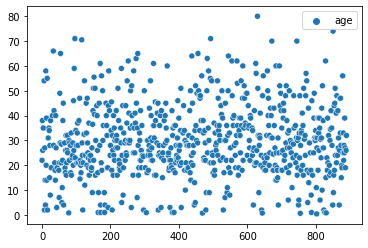

In [5]:
sns.scatterplot(data = titanic_df[['age']])

##### Why not just use a line plot?

<AxesSubplot:>

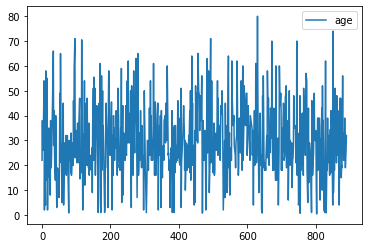

In [6]:
sns.lineplot(data = titanic_df[['age']])

<AxesSubplot:>

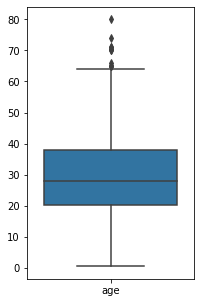

In [7]:
plt.figure(figsize=(3,5))
sns.boxplot(data = titanic_df[['age' ]])

The data seems fine. What would we think if we had the outliers under the bottom whisker?

---
#### Back to our vaccinations data:

In [8]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


use a groupby and look at part of the data, by location:

In [9]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].max()
grouped_df.reset_index(inplace = True)

In [10]:
grouped_df.tail()

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
230,Wallis and Futuna,343.0,57.68,NaN
231,World,43535386.0,57.12,18.61
232,Yemen,10240.0,1.33,NaN
233,Zambia,36338.0,11.15,0.18
234,Zimbabwe,75000.0,22.83,2.30


fix the NaN's, or else the graphs will just ignore them

In [ ]:
grouped_df.fillna(0, inplace = True)

In [ ]:
grouped_df.tail()

##### The `world` row shouldn't be there. Remove it using `.drop()`. We need the `.index` to do so:

In [ ]:
grouped_df.loc[grouped_df.location == 'World']

In [ ]:
grouped_df.loc[grouped_df.location == 'World'].index

Now that we understand what `.index` does, we can use `.drop()`

In [ ]:
grouped_df.drop(grouped_df.loc[grouped_df.location == 'World'].index, inplace = True)

#### sort the values using 'sort_values()`

In [ ]:
grouped_df.sort_values('total_boosters_per_hundred', ascending = False).head(10)

In [ ]:
sns.scatterplot(data = grouped_df['total_boosters_per_hundred'])

In [ ]:
sns.boxplot(data = grouped_df[['total_boosters_per_hundred','people_fully_vaccinated_per_hundred' ]])

It's not perfect. Or else we would have had outliers for any number over a 100. 

<a id='section2'></a>

### 2. Histograms

Back to the titanic

Count passengers according to their age:

In [ ]:
sns.histplot(data=titanic_df, x='age')

Percent of passangers at each age:

In [ ]:
sns.histplot(data=titanic_df, x='age', stat='percent')

Probabiltiy that a passanger is at a certain age:

In [ ]:
sns.histplot(data=titanic_df, x='age', stat='probability')

Density - the area of the histogram equals 1

In [ ]:
sns.histplot(data=titanic_df, x='age', stat='density')

---
Shape is the same so long as number of bins is the same. 

Change the number of bins:

In [ ]:
sns.histplot(data=titanic_df, x='age', stat='percent', bins = 3)

---
Histograms of males and females:

<AxesSubplot:xlabel='age', ylabel='Percent'>

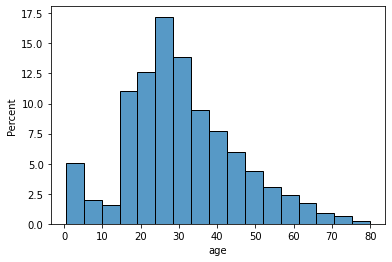

In [24]:
sns.histplot(data=titanic_df[titanic_df.sex == 'male'], x='age', stat='percent')

>#### Now you - create a histogram for females:

Why are the graphs not with the same number of bins?

In [25]:
len(titanic_df[titanic_df.sex == 'male'])

577

In [26]:
len(titanic_df[titanic_df.sex == 'female'])

314

>#### Now you - how can you fix this?

Both sexs on the same graph:

<AxesSubplot:xlabel='age', ylabel='Percent'>

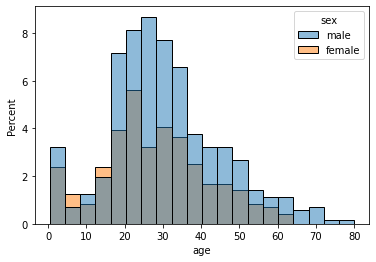

In [27]:
sns.histplot(data=titanic_df, x='age', stat='percent', hue='sex', multiple = 'layer')

try other options:

multiple{“layer”, “dodge”, “stack”, “fill”}

> #### what is the default?

---
#### Back to our vaccinations data:

In [28]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 

In [29]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].max()
grouped_df.reset_index(inplace = True)

In [30]:
grouped_df.drop(grouped_df.loc[grouped_df.location == 'World'].index, inplace = True)
grouped_df.fillna(0, inplace = True)

<AxesSubplot:xlabel='total_boosters_per_hundred', ylabel='Percent'>

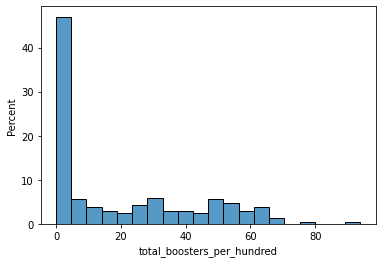

In [31]:
sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

In [32]:
len(grouped_df)

234

Lets remove countries that didn't issue boosters:

In [33]:
grouped_df.drop(grouped_df[grouped_df.total_boosters_per_hundred == 0].index, inplace=True)

In [34]:
len(grouped_df)

157

<AxesSubplot:xlabel='total_boosters_per_hundred', ylabel='Percent'>

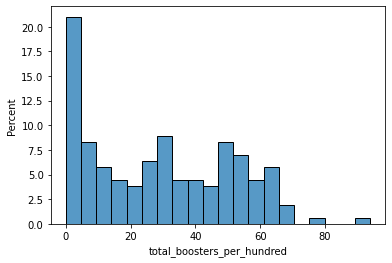

In [35]:
sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

Note that the y-axis is only up to 20% now

---
>#### Your turn:
>
>Do the same, but for another column
---


<a id='section3'></a>

### 3. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [36]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

,height,weight,age
0,161,67,20
1,156,65,20
2,172,89,20


In [37]:
df.mean()

height    163.000000
weight     73.666667
age        20.000000
dtype: float64

In [38]:
df.std()

height     8.185353
weight    13.316656
age        0.000000
dtype: float64

---
>### Functions covered in this unit:
>
> `scatterplot` - (x,y) points on the graphs
>
> `lineplot` - simple lineplot
>
> `plt.figure(fixsize(m,n))` - set the size of the graph\figure to (m,n)
>
> `boxplot` - create a boxplot
>
> `reset_index` - reset index to a numerical index beginning at 0
>
> `index` - find the row index of the row that fills a certain condition
>
> `drop` - remove a row according to it's index
>
> `sort_values()` - sorts values 
>
> `histplot` - create a histogram
>
> `std()` - standard deviation
>
---

<a id='section4'></a>

### 4. Same stats, different graphs

In [39]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [42]:
dino = pd.read_csv(url, sep='\t')

In [44]:
dino.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


How many datasets?

In [46]:
dino['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [47]:
dino.groupby('dataset').agg(['count', 'mean', 'var', 'std'])

x                                       y             \
           count       mean         var        std count       mean   
dataset                                                               
away         142  54.266100  281.227029  16.769825   142  47.834721   
bullseye     142  54.268730  281.207393  16.769239   142  47.830823   
circle       142  54.267320  280.898024  16.760013   142  47.837717   
dino         142  54.263273  281.069988  16.765142   142  47.832253   
dots         142  54.260303  281.156953  16.767735   142  47.839829   
h_lines      142  54.261442  281.095333  16.765898   142  47.830252   
high_lines   142  54.268805  281.122364  16.766704   142  47.835450   
slant_down   142  54.267849  281.124206  16.766759   142  47.835896   
slant_up     142  54.265882  281.194420  16.768853   142  47.831496   
star         142  54.267341  281.197993  16.768959   142  47.839545   
v_lines      142  54.269927  281.231512  16.769959   142  47.836988   
wide_lines   142  54.266916  281.232887  16.770000   142  47.831602   
x_shape      142  54.260150  281.231481  16.769958   142  47.839717   

                                   
                   var        std  
dataset                            
away        725.749775  26.939743  
bullseye    725.533372  26.935727  
circle      725.226844  26.930036  
dino        725.515961  26.935403  
dots        725.235215  26.930192  
h_lines     725.756931  26.939876  
high_lines  725.763490  26.939998  
slant_down  725.553749  26.936105  
slant_up    725.688605  26.938608  
star        725.239695  26.930275  
v_lines     725.638809  26.937684  
wide_lines  725.650560  26.937902  
x_shape     725.224991  26.930002

What can you say about the mean, variance, std, and number of points in each dataset?

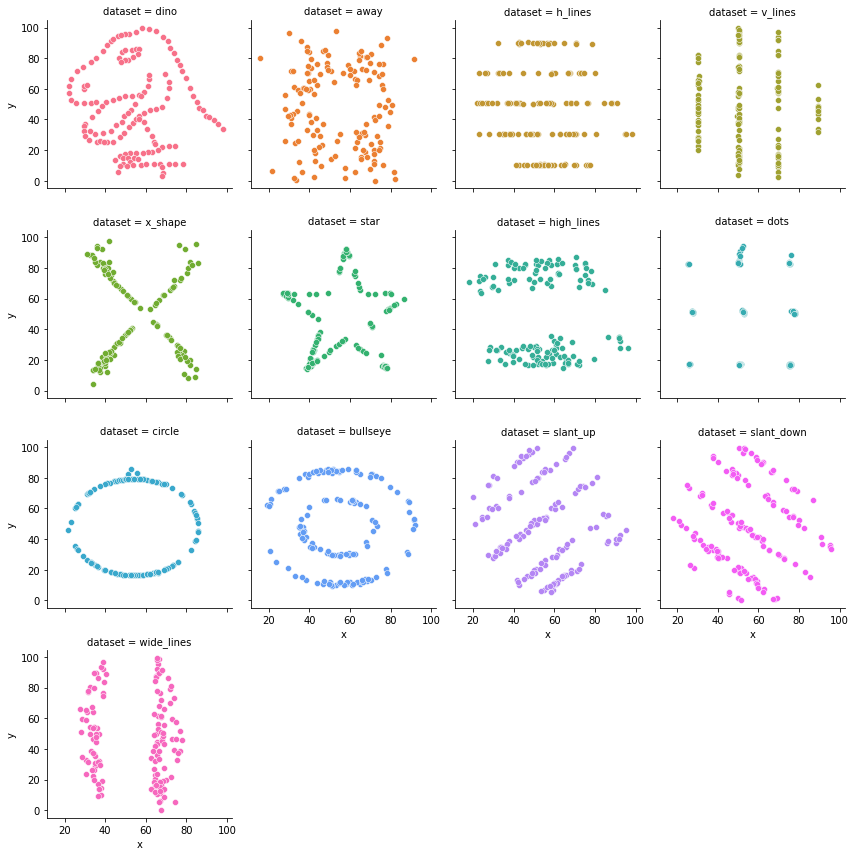

In [48]:
grid_scatterplots = sns.FacetGrid(dino, col="dataset", hue="dataset", col_wrap=4)
grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")

In [58]:
dino[dino.dataset == 'slant_down']

,dataset,x,y
1562,slant_down,52.872021,97.343223
1563,slant_down,59.014144,93.574875
1564,slant_down,56.375109,96.305148
1565,slant_down,37.839200,94.359444
1566,slant_down,39.885373,90.634662
...,...,...,...
1699,slant_down,39.596501,32.136132
1700,slant_down,95.593416,33.234129
1701,slant_down,52.772288,99.613472
1702,slant_down,53.178614,98.603861


<AxesSubplot:xlabel='x', ylabel='Count'>

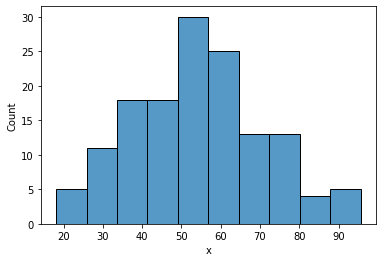

In [59]:
sns.histplot(data = dino[dino.dataset == 'slant_down'], x = 'x')

#sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

<AxesSubplot:xlabel='x', ylabel='Count'>

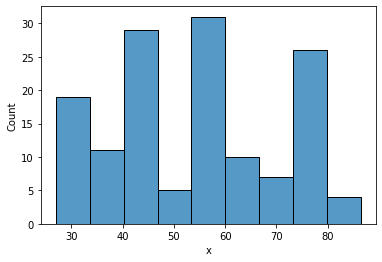

In [74]:
sns.histplot(data = dino[dino.dataset == 'star'], x = 'x')

<AxesSubplot:xlabel='x', ylabel='Count'>

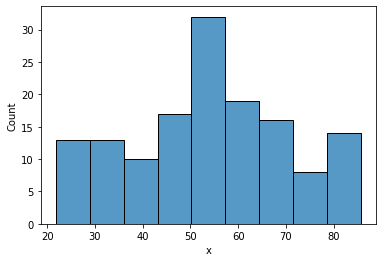

In [61]:
sns.histplot(data = dino[dino.dataset == 'circle'], x = 'x')

<AxesSubplot:>

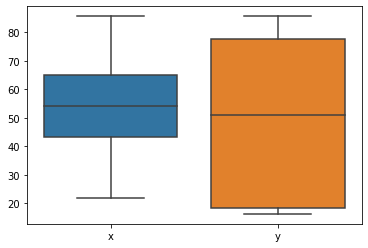

In [62]:
sns.boxplot(data = dino[dino.dataset == 'circle'])

<AxesSubplot:>

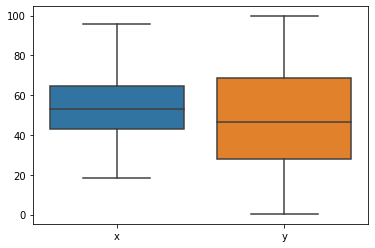

In [63]:
sns.boxplot(data = dino[dino.dataset == 'slant_down'])

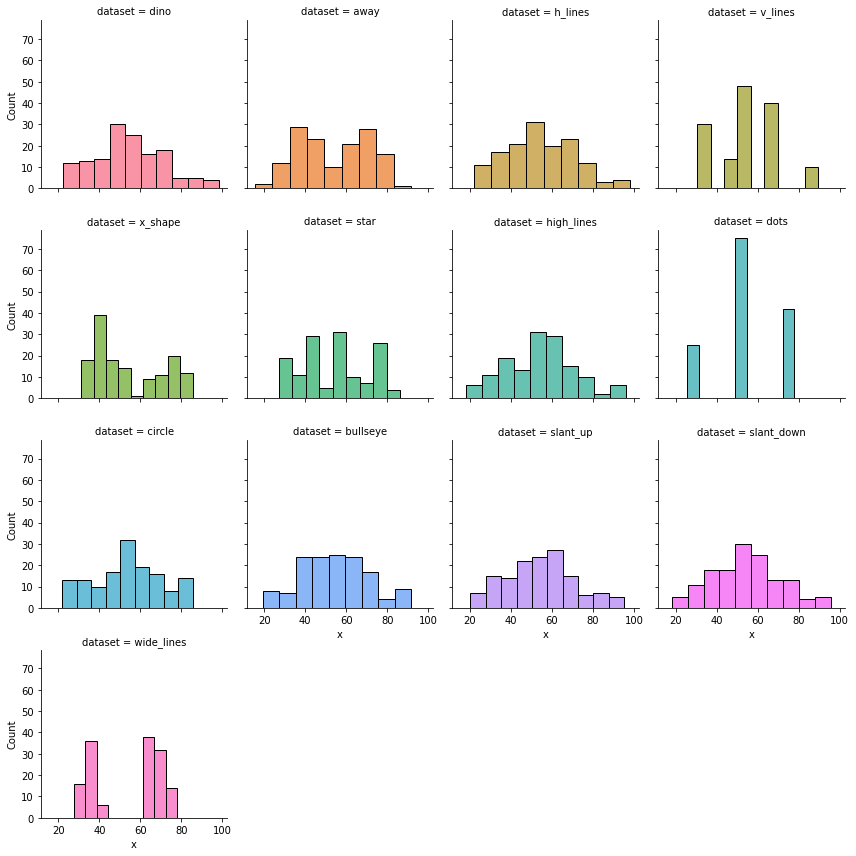

In [66]:
grid_histplots = sns.FacetGrid(dino, col="dataset", hue="dataset", col_wrap=4)
grid_histplots.map_dataframe(sns.histplot, x = 'x')